# 🍷 Wine Quality Analysis
### Domain: Alcoholic Beverage Sector

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv("winequality.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Data Cleaning

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

### Observation :
The dataset contains NO null values

### Duplicate Records Check

In [8]:
df.duplicated().sum()

np.int64(1177)

### Observation :
The dataset contains 1,177 duplicate rows.

### Dataset Shape Before Removing Duplicates

In [9]:
df.shape

(6497, 14)

### Removing Duplicate Records

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

### Dataset Shape After Removing Duplicates

In [11]:
df.shape

(5320, 14)

#### Observation:
- 1,177 duplicate records were removed.
- Final dataset contains 5,320 unique rows and 14 columns.
- The dataset is now clean and ready for EDA and modeling.

### Encode Color Column

In [12]:
df['color'] = df['color'].map({'red': 0, 'white': 1})

### Data Distribution Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  good                  5320 non-null   int64  
 13  color                 5320 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 623.4 KB


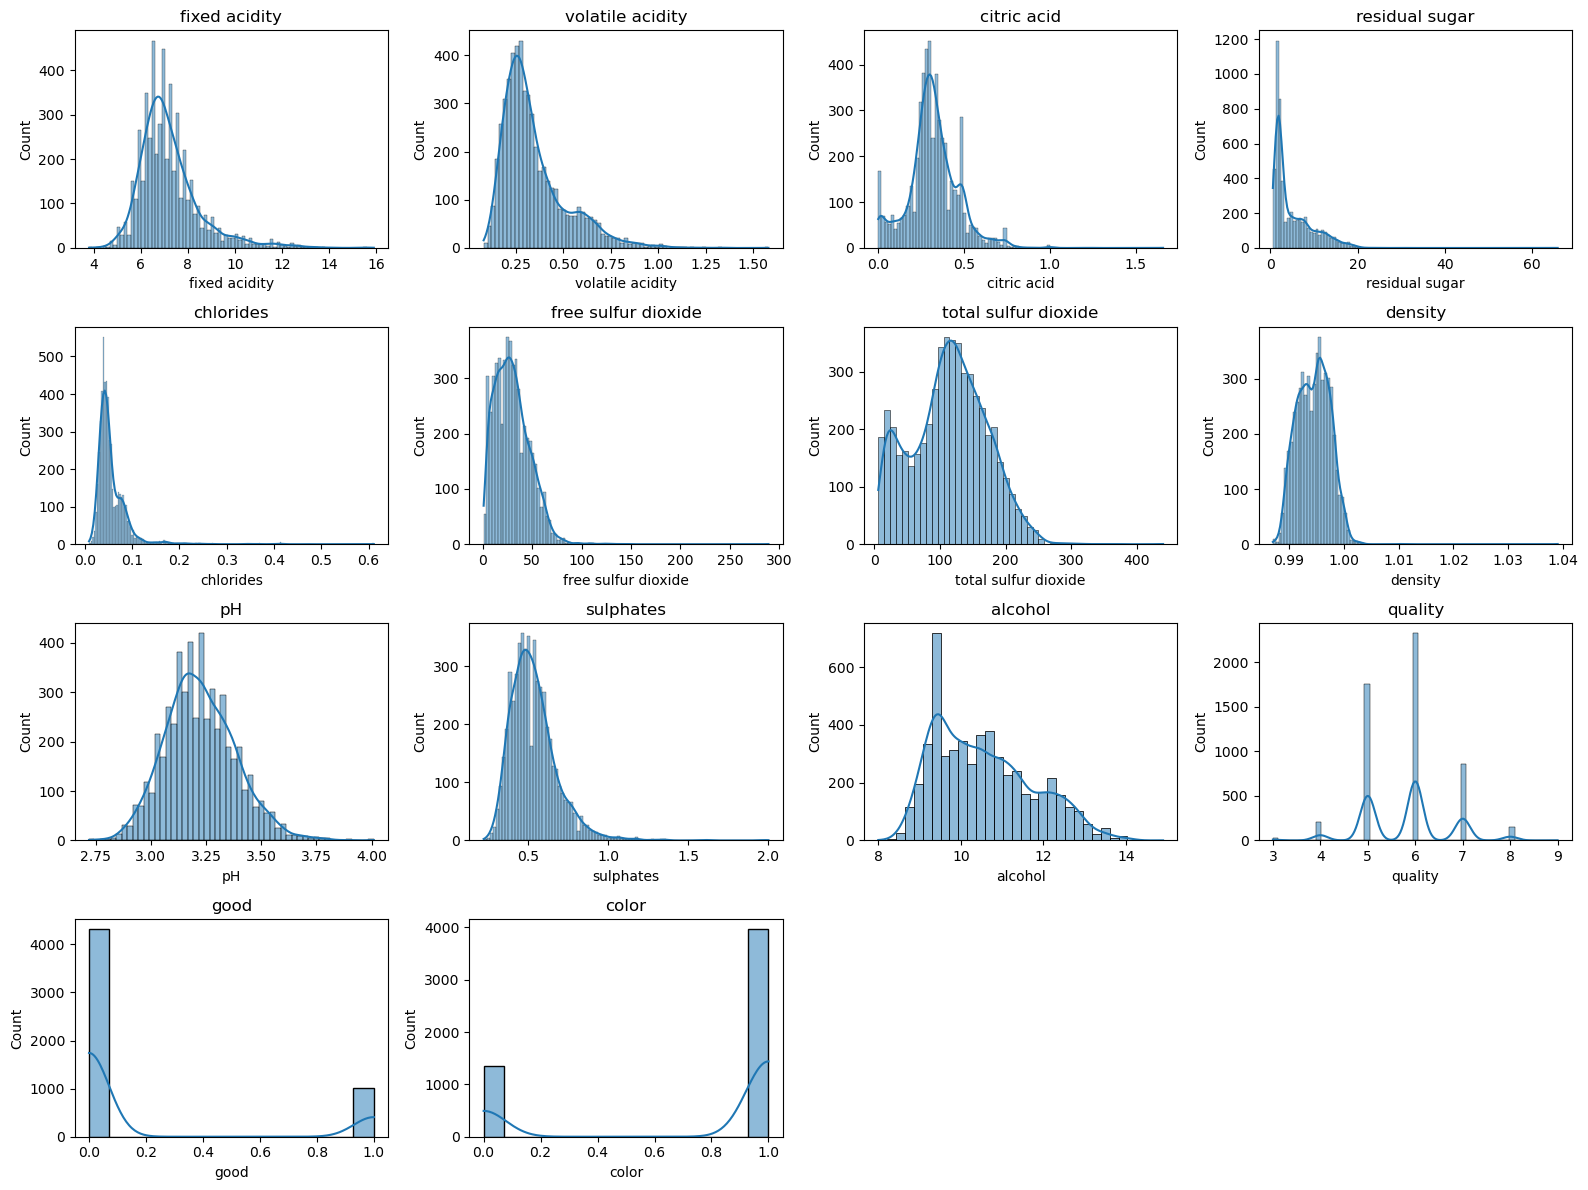

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Observation:
- Several features such as residual sugar, chlorides, and sulfur dioxide are right-skewed.
- Features like pH and density show relatively normal distributions.

### Correlation analysis with wine quality
##### Identify features with strong positive or negative impact

In [15]:
# Correlation with quality
corr_with_quality = df.corr()['quality'].sort_values(ascending=False)
print(corr_with_quality)

quality                 1.000000
good                    0.748442
alcohol                 0.469422
color                   0.114809
citric acid             0.097954
free sulfur dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total sulfur dioxide   -0.050296
residual sugar         -0.056830
fixed acidity          -0.080092
chlorides              -0.202137
volatile acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64


 ### Feature Relationship with Wine Quality

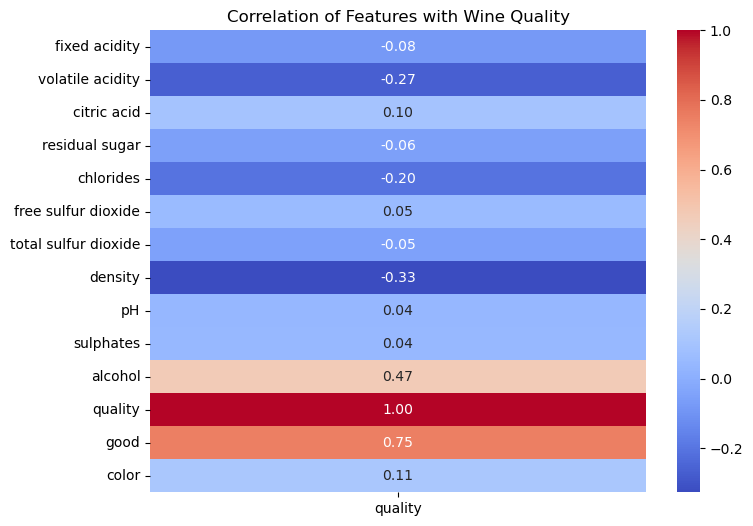

In [16]:
# Heatmap for correlation with quality
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[num_cols].corr()[['quality']],
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation of Features with Wine Quality")
plt.show()

### Observation:
- Positive correlation indicates features that improve wine quality.
- Negative correlation indicates features that reduce wine quality.

### Create Quality Categories
 MODIFIED: 3 balanced categories
- ≤ 5 → Average
- 6-7 → Good
- ≥ 8 → Excellent

In [17]:
def quality_category(score):
    if score <= 5:
        return "Average"
    elif score <= 7:
        return "Good"
    else:
        return "Excellent"

df['quality_category'] = df['quality'].apply(quality_category)

### Check Distribution

In [18]:
print("\nQuality Category Distribution:")
print(df['quality_category'].value_counts())
print("\nQuality Score Distribution:")
print(df['quality'].value_counts().sort_index())


Quality Category Distribution:
quality_category
Good         3179
Average      1988
Excellent     153
Name: count, dtype: int64

Quality Score Distribution:
quality
3      30
4     206
5    1752
6    2323
7     856
8     148
9       5
Name: count, dtype: int64


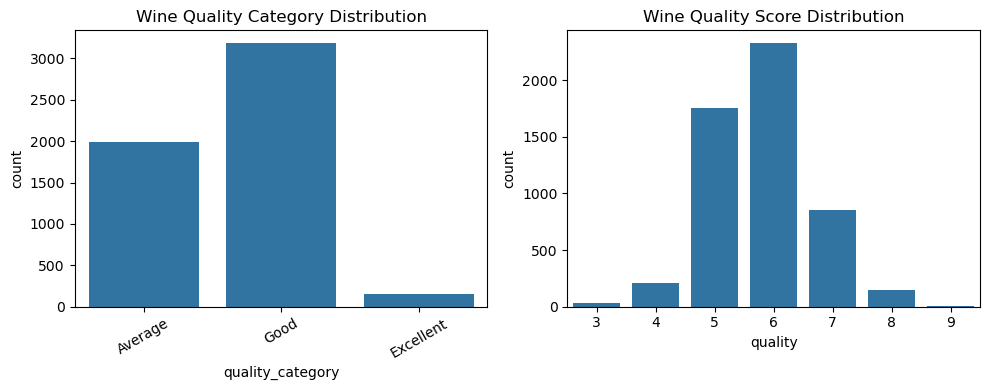

In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='quality_category', data=df, order=['Average', 'Good', 'Excellent'])
plt.title("Wine Quality Category Distribution")
plt.xticks(rotation=30)

plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Score Distribution")

plt.tight_layout()
plt.show()

### Key Insights from EDA

- Alcohol shows a strong positive correlation with wine quality.
- Volatile acidity has a strong negative impact on wine quality.
- Most wines fall into the average quality range (scores 5–6), indicating class imbalance.

### Business Insights & Recommendations

- Focus on controlling alcohol content, as higher alcohol is associated with better quality wines.
- Reduce volatile acidity during fermentation to avoid poor taste and quality degradation.
- Monitor sulphates and citric acid levels to enhance flavor balance and preservation.


### Save Clean Dataset

In [20]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0,Good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1,Good
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1,Average
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1,Good
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1,Good


In [15]:
df.to_csv("wine_quality_categorized.csv", index=False)

---

# Model Building

### Feature & Target Selection

In [21]:
X = df.drop(columns=['quality', 'quality_category','good'])
y = df['quality_category']

In [24]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


### Train–Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [18]:
print("\nTraining set distribution:")
print(y_train.value_counts())
print("\nTest set distribution:")
print(y_test.value_counts())


Training set distribution:
quality_category
Good         2384
Average      1491
Excellent     115
Name: count, dtype: int64

Test set distribution:
quality_category
Good         795
Average      497
Excellent     38
Name: count, dtype: int64


### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Handle Class Imbalance with RandomOverSampler
 Using RandomOverSampler instead of SMOTE to avoid k_neighbors issue

In [20]:
from imblearn.over_sampling import RandomOverSampler

print("\nApplying Random Over-Sampling to handle class imbalance...")
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

print("\nAfter Over-Sampling:")
print(pd.Series(y_train_balanced).value_counts())


Applying Random Over-Sampling to handle class imbalance...

After Over-Sampling:
quality_category
Good         2384
Excellent    2384
Average      2384
Name: count, dtype: int64


In [21]:
# Scale the balanced data
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

## Train Models

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("\nTraining models with balanced data...")


Training models with balanced data...


 #### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced_scaled, y_train_balanced)
knn_pred = knn.predict(X_test_scaled)

 #### Logistic Regression

In [24]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_balanced_scaled, y_train_balanced)
lr_pred = lr.predict(X_test_scaled)

#### SVM

In [25]:
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train_balanced_scaled, y_train_balanced)
svm_pred = svm.predict(X_test_scaled)

#### Decision Tree

In [26]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_balanced, y_train_balanced)
dt_pred = dt.predict(X_test)

#### Random Forest

In [27]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_balanced, y_train_balanced)
rf_pred = rf.predict(X_test)


## Model Comparison

Model Comparision
                     Accuracy
KNN                  0.646617
Logistic Regression  0.478947
SVM                  0.575940
Decision Tree        0.630827
Random Forest        0.733835


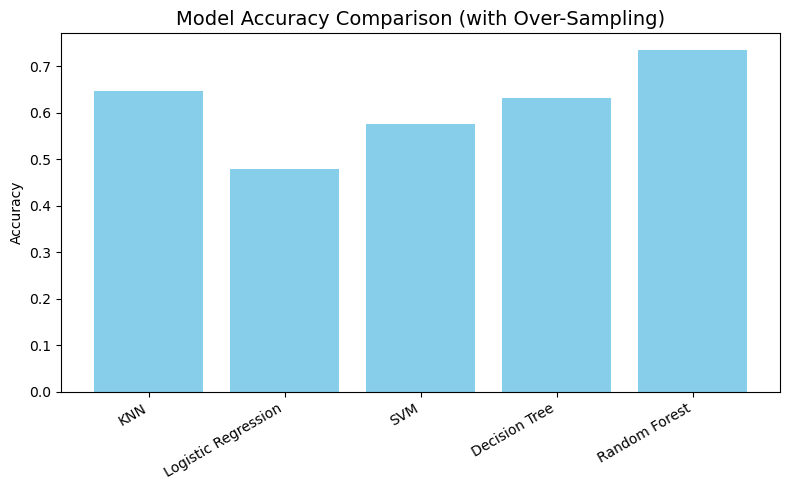

In [28]:
results = {
    "KNN": accuracy_score(y_test, knn_pred),
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "SVM": accuracy_score(y_test, svm_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}

comparison_df = pd.DataFrame.from_dict(
    results, orient='index', columns=['Accuracy']
)

print("Model Comparision")
print(comparison_df)

plt.figure(figsize=(8, 5))
plt.bar(comparison_df.index, comparison_df['Accuracy'], color='skyblue')
plt.title("Model Accuracy Comparison (with Over-Sampling)", fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

## Evaluation of Best Model

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

print("Random Forest - Initial Evaluation")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest - Initial Evaluation

Confusion Matrix:
[[331   0 166]
 [  1   1  36]
 [149   2 644]]

Classification Report:
              precision    recall  f1-score   support

     Average       0.69      0.67      0.68       497
   Excellent       0.33      0.03      0.05        38
        Good       0.76      0.81      0.78       795

    accuracy                           0.73      1330
   macro avg       0.59      0.50      0.50      1330
weighted avg       0.72      0.73      0.72      1330



## Hyperparameter Tuning with GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

rf_grid = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',  # Changed to f1_macro for better handling of imbalanced data
    n_jobs=-1,
    verbose=1
)

print("Hyperparameter Tuning")
print("Starting GridSearchCV (this may take a few minutes)...")
grid_search.fit(X_train_balanced, y_train_balanced)

Hyperparameter Tuning
Starting GridSearchCV (this may take a few minutes)...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='f1_macro', verbose=1)

### Train Final Random Forest Model with Best Parameters

In [31]:
final_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=25,
    class_weight='balanced',
    random_state=42
)

# Train on balanced data
final_rf.fit(X_train_balanced, y_train_balanced)

# Predict on test data
final_rf_pred = final_rf.predict(X_test)

# Evaluation
print("\nFinal Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, final_rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, final_rf_pred))


Final Random Forest Performance
Accuracy: 0.7330827067669173

Classification Report:
              precision    recall  f1-score   support

     Average       0.68      0.67      0.68       497
   Excellent       0.33      0.03      0.05        38
        Good       0.76      0.80      0.78       795

    accuracy                           0.73      1330
   macro avg       0.59      0.50      0.50      1330
weighted avg       0.72      0.73      0.72      1330



### Plot Confusion Matrix

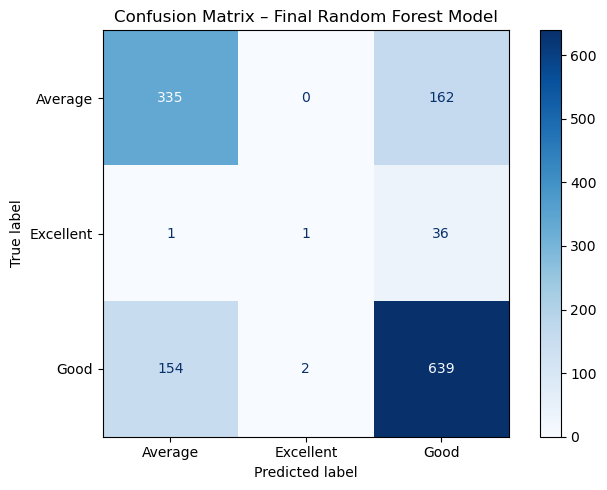

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, final_rf_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Average', 'Excellent', 'Good']
)

fig, ax = plt.subplots(figsize=(7, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Final Random Forest Model")
plt.tight_layout()
plt.show()